## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [ ]:
a = [1, 2, 3, 4, 5]

a = a[0:round(len(a) / 2)] + a[-1:round(len(a) / 2)-1:-1]

print(a)

[1, 2, 5, 4, 3]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

b = a[2:5:2]
c = a[-2:-5:-2]

a[2:5:2] = c
a[-2:-5:-2] = b

print(a)

[1, 2, 21, 4, 19, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 5, 20, 3, 22]


## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [ ]:
a = [1, 2, 3, 4, 5]

b = [i**2 for i in a]

print(b)

[1, 4, 9, 16, 25]


Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять. 

In [ ]:
a = [1, 2, 3, 4, 5]

b = [i- 5 for i in a]

print(b)

[-4, -3, -2, -1, 0]


## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке. 

In [ ]:
s = 'abcd'

print(ord(max(s)) - ord(min(s)))

3


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру. 

In [ ]:
s = 'bacf'

a = [i.upper() for i in s]
a.sort()

print(''.join(a))

ABCF


## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [ ]:
import numpy as np

a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a = np.array(a)

print(np.lib.stride_tricks.as_strided(a, shape=(a.shape[0] - 3, 4), strides=(a.itemsize, a.itemsize)))

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]


Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [ ]:
import numpy as np

a = [0, 1, 2, 3, 4]

b = [[int(j) for j in np.binary_repr(i, width = 8)] for i in a]

print(b)

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0]]


## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/laptop_price.csv", encoding='cp1251')

In [ ]:
print(f'Types: {list(set([str(dt) for dt in df.dtypes]))}')

Types: ['object', 'float64', 'int64']


In [ ]:
print(f'В датасете {sum([sum(df[col].isnull()) for col in df])} пропущенных значений')

В датасете 0 пропущенных значений


In [73]:
df['Ram'] = [int(i.replace('GB', '')) for i in df.loc[:, 'Ram']]
print('Ram separation')
df.head()

Ram separation


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [74]:
df['ScreenResolutionWidth'] = [int(i.split(' ')[-1].split('x')[0]) for i in df.loc[:, 'ScreenResolution']]
df['ScreenResolutionHeight'] = [int(i.split(' ')[-1].split('x')[1]) for i in df.loc[:, 'ScreenResolution']]
df = df.drop('ScreenResolution', axis=1)
print('ScreenResolution separation')
df.head()

ScreenResolution separation


,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolutionWidth,ScreenResolutionHeight
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600


In [75]:
df['CpuType'] = [' '.join(i.split(' ')[0:-1]) for i in df.loc[:, 'Cpu']]
df['CpuFrequency'] = [i.split(' ')[-1].replace('GHz', '') for i in df.loc[:, 'Cpu']]
df = df.drop('Cpu', axis=1)
print('Cpu separation')
df.head()

Cpu separation


,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolutionWidth,ScreenResolutionHeight,CpuType,CpuFrequency
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,Intel Core i5,3.1


In [76]:
df['Weight'] = [float(i.replace('kg', '')) for i in df.loc[:, 'Weight']]
print('Weight separation')
df.head()

Weight separation


,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolutionWidth,ScreenResolutionHeight,CpuType,CpuFrequency
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1


In [77]:
df['Memory'] = [float(i.split(' ')[0].replace('GB', '').replace('TB', '')) for i in df.loc[:, 'Memory']]
print('Memory separation')
df.head()

Memory separation


,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolutionWidth,ScreenResolutionHeight,CpuType,CpuFrequency
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128.0,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256.0,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1


In [78]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolutionWidth,ScreenResolutionHeight,CpuType,CpuFrequency
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128.0,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256.0,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1


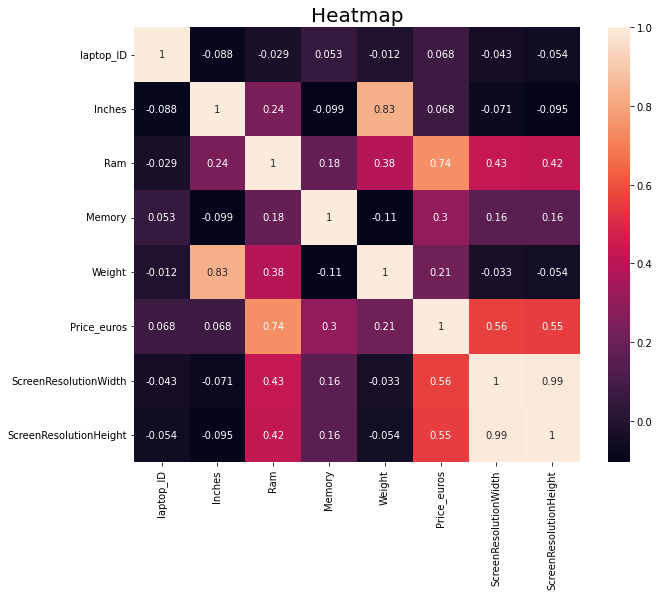

In [79]:
plt.figure(figsize=(10,8))

plt.title('Heatmap', fontsize=20)

sns.heatmap(df.corr(), annot=True)
plt.show()

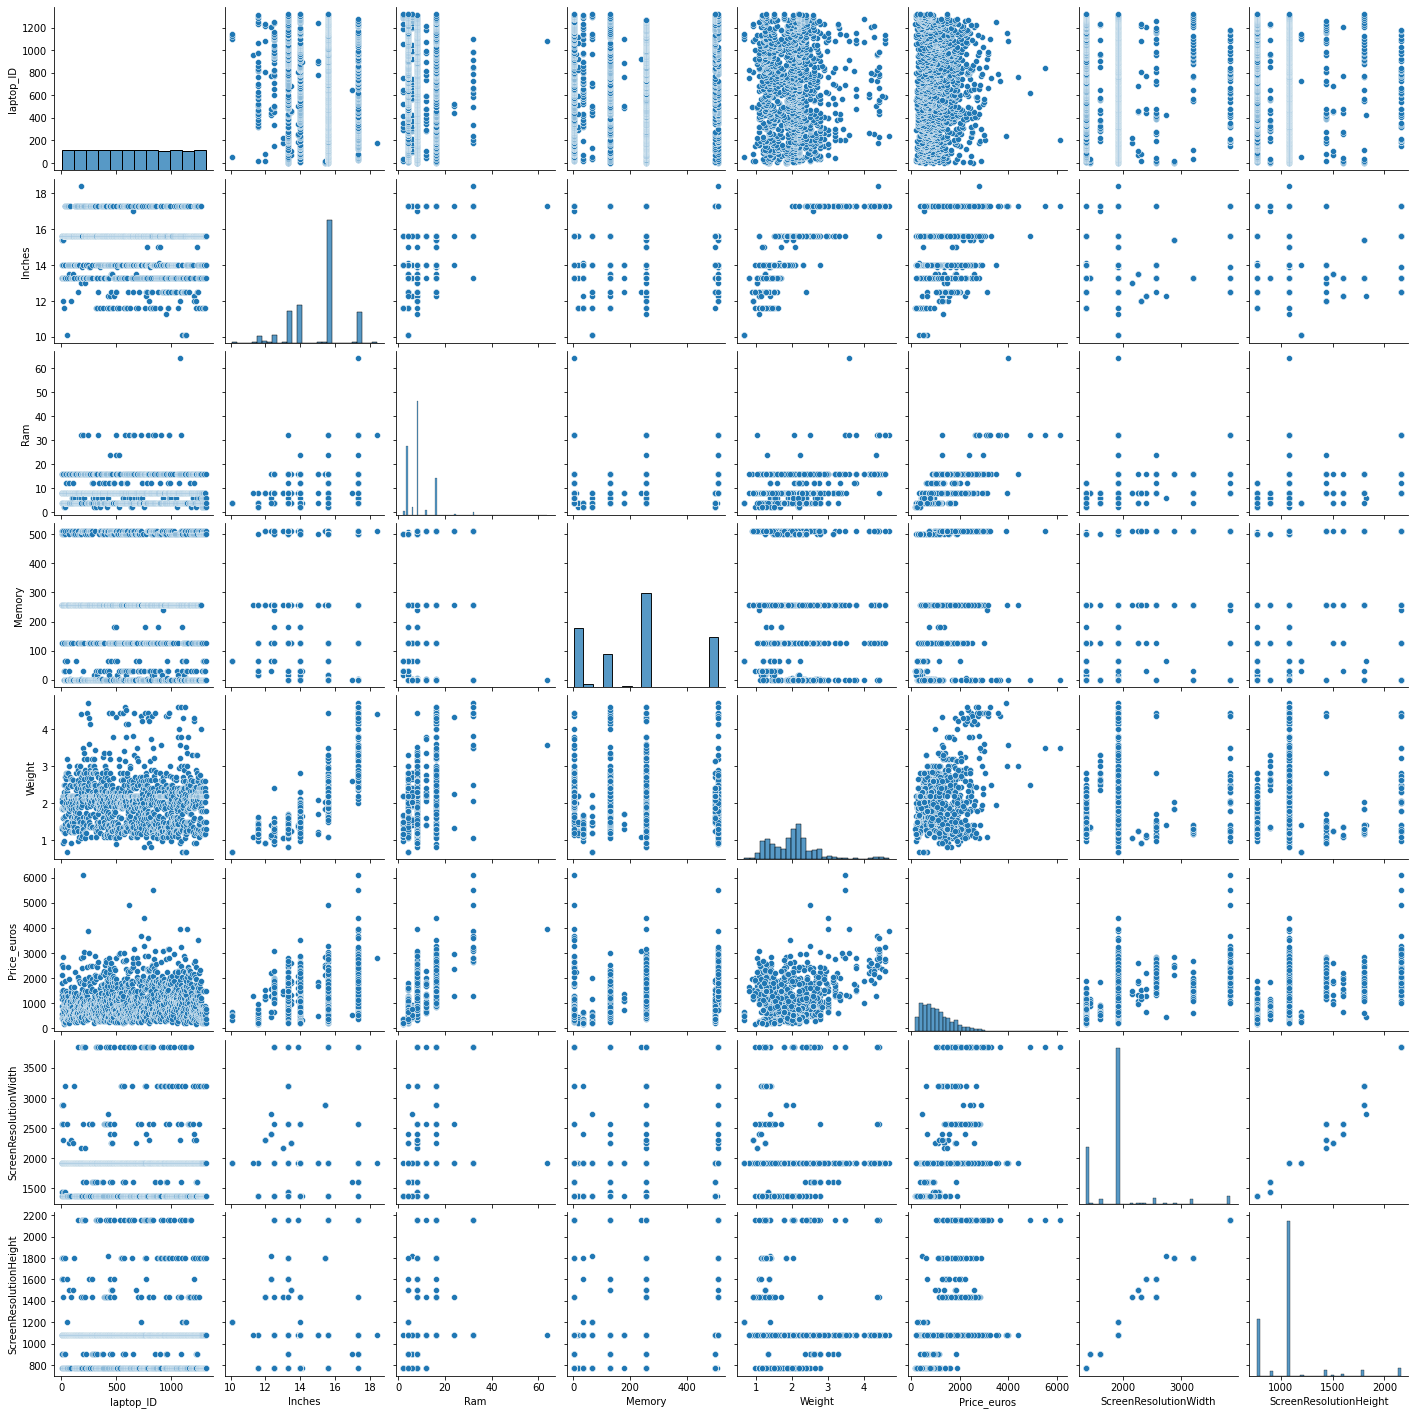

In [80]:
sns.pairplot(df)
plt.show()

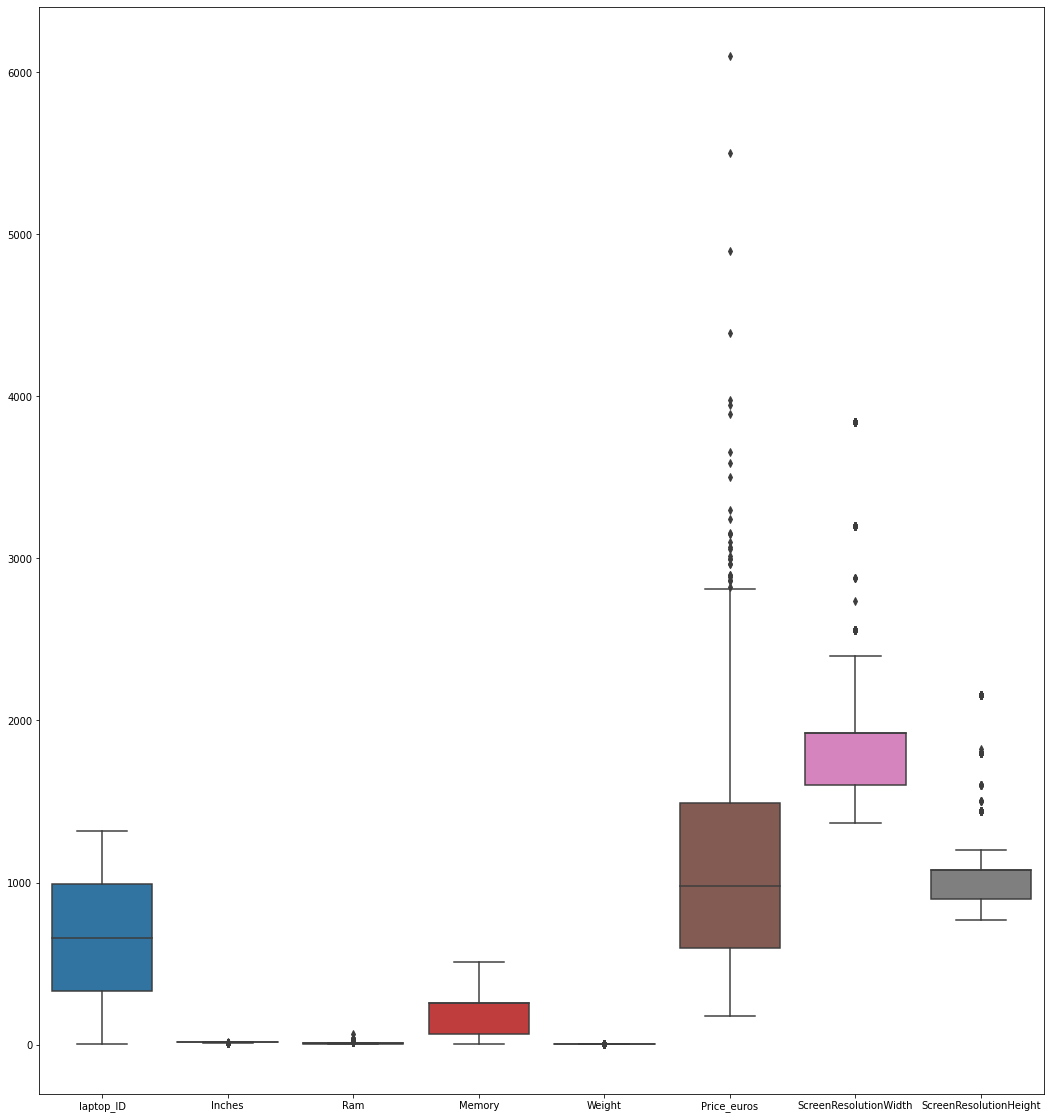



Выбросы в laptop_ID
0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_ID, Length: 652, dtype: int64


Выбросы в Inches
0       13.3
1       13.3
4       13.3
7       13.3
14      12.0
        ... 
1282    11.6
1285    13.3
1289    13.3
1296    11.6
1299    13.3
Name: Inches, Length: 432, dtype: float64


Выбросы в Ram
3       16
6       16
8       16
12      16
17      16
        ..
1286     2
1292     2
1296     2
1299    16
1300     2
Name: Ram, Length: 268, dtype: int64


Выбросы в Memory
3       512.0
5       500.0
8       512.0
10      500.0
11      500.0
        ...  
1296     32.0
1297    500.0
1299    512.0
1301      1.0
1302    500.0
Name: Memory, Length: 595, dtype: float64


Выбросы в Weight
0       1.37
1       1.34
4       1.37
7       1.34
8       1.30
        ... 
1289    1.20
1291    2.40
1293    2.60
1296    1.17
1299    1.30
Name: Weight, Length: 638, dtype: flo

In [91]:
plt.figure(figsize=(18,20))
sns.boxplot(df)
plt.show()

for c in df.select_dtypes(include=['number']):
    print('\n')
    print(f'Выбросы в {c}')
    col = df[c]
    print(col[(col < col.quantile(0.25)) | (col > col.quantile(0.75))])

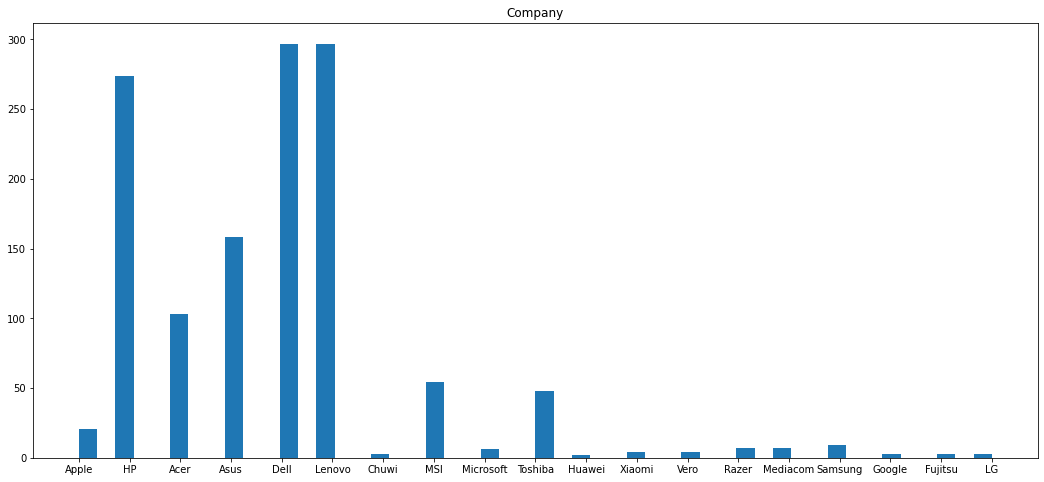

In [83]:
plt.figure(figsize=(18,8))
plt.title('Company')
plt.hist(df['Company'], bins=50)
plt.show()
